O aspecto lúdico é o  melhor combustível para o processo de aprendizado. O assunto do trabalho para o final da disciplina será sobre algoritmos de aprendizagem de máquina e classificação. A base de dados utilizada será o Cartola FC. Um aplicativo de gestão de futebol baseado em desempenho de partidas reais do campeonato brasileiro.
Observação: Existe n iniciativas de uso de algoritmos da IA para ajudar os jogadores a obterem o melhor desempenho no jogo.

Objetivo do trabalho: Realizar o processo de estudo da base de dados; construir uma rede neural para definir o o posicionamento do jogador; Classificar a posição do jogador conforme seus rendimentos; Em algum trabalho futuro sugerir a escalação dos times.

In [1]:
#importando o PANDAS
import pandas as pd

In [2]:
#localizando o arquivo e listando
dsr = pd.read_csv('C:/Users/stein/Desktop/2017_scouts_raw.csv' , delimiter=';')
dsr = dsr.fillna(0)
#exibindo lista 
dsr[ [ 'atleta_id' , 'apelido' ,  'pontos_num']].head()

,atleta_id,apelido,pontos_num
0,36540,Juan,0.0
1,36612,Ze Roberto,0.0
2,36943,Paulo Autuori,0.0
3,37245,Guto Ferreira,0.0
4,37246,Ney Franco,0.0


In [3]:
#listando posições
dsr['posicao_id'].unique()

array(['zag', 'lat', 'tec', 'mei', 'ata', 'gol'], dtype=object)

Dimensões

In [4]:
#listando quantidade de registros e colunas
dsr.shape

(32408, 33)

In [5]:
#listando tipo de situações par jogo
dsr['status_id'].unique()

array(['Nulo', 'Provavel', 'Contundido', 'Duvida', 'Suspenso'],
      dtype=object)

In [6]:
#totalizador de atletas por categoria

#totalizador de MEIAS
qtde_jogadores = dsr['atleta_id'].unique().size
print( 'Quantidade de jogadores:' , qtde_jogadores )
filtromeia = dsr['posicao_id'] == 'mei'
quadromeia = dsr[filtromeia]
qtde_meias = quadromeia['atleta_id'].unique().size

#totalizador de ZAGUEIROS
print( 'Quantidade de meias:' , qtde_meias )
filtrozag = dsr['posicao_id'] == 'zag'
quadrozagueiro = dsr[ filtrozag ]
qtde_zagueiros = quadrozagueiro['atleta_id'].unique().size
print( 'Quantidade de zagueiros:' , qtde_zagueiros )

#totalizador de LATERAIS
filtrolat = dsr['posicao_id'] == 'lat'
quadrolaterais = dsr[ filtrolat ]
qtde_laterais = quadrolaterais['atleta_id'].unique().size
print( 'Quantidade de laterais:' , qtde_laterais )

#totalizador de ATACANTES
filtroata = dsr['posicao_id'] == 'ata'
quadroatacantes = dsr[ filtroata ]
qtde_atacantes = quadroatacantes['atleta_id'].unique().size
print( 'Quantidade de atacantes:' , qtde_atacantes )

#totalizador de GOLEIROS
filtrogoleiro = dsr['posicao_id'] == 'gol'
quadrogoleiros = dsr[ filtrogoleiro ]
qtde_goleiros = quadrogoleiros['atleta_id'].unique().size
print( 'Quantidade de goleiros:' , qtde_goleiros )

#totalizador de TECNICOS
filtrotecnico = dsr['posicao_id'] == 'tec'
quadrotecnicos = dsr[ filtrotecnico ]
qtde_tecnicos = quadrotecnicos['atleta_id'].unique().size
print( 'Quantidade de tecnicos:' , qtde_tecnicos )

Quantidade de jogadores: 1015
Quantidade de meias: 333
Quantidade de zagueiros: 162
Quantidade de laterais: 145
Quantidade de atacantes: 233
Quantidade de goleiros: 96
Quantidade de tecnicos: 46


Cálculo de saldo de ataque de saldo de defesa

In [7]:
#calculo das regras para o peso de cada classificador de jogadores
j = dsr
j['SA']=   8*j['G'] + 5*j['A'] + 3.5*j['FT'] + 1*j['FD'] + 0.7*j['FF'] + 0.5*j['FS'] - 3.5*j['PP'] - 0.5*j['I'] - 0.3*j['PE'];
j['SD']= 5*j['SG'] + 7*j['DP'] + 3*j['DD'] + 1.7*j['RB'] - 6*j['GC'] - 5*j['CV'] - 2*j['CA'] - 2*j['GS'] - 0.5*j['FC'];

j.head()

,Unnamed: 0,A,CA,CV,DD,DP,FC,FD,FF,FS,...,media_num,nome,pontos_num,posicao_id,preco_num,Rodada,status_id,variacao_num,SA,SD
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Juan Silveira dos Santos,0.0,zag,5.0,0,Nulo,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Jose Roberto da Silva Junior,0.0,lat,8.0,0,Provavel,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Paulo Autuori,0.0,tec,10.0,0,Provavel,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Augusto Sergio Ferreira,0.0,tec,4.0,0,Provavel,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Ney Franco da Silveira Junior,0.0,tec,4.0,0,Provavel,0.0,0.0,0.0


Melhores notas por jogador

In [8]:
#calculo de melhores notas por jogador
melhores_notas = dsr.sort_values('pontos_num', ascending=False)
melhores_notas[['atleta_id', 'apelido' , 'pontos_num' , 'status_id' , 'posicao_id']].head(10)

,atleta_id,apelido,pontos_num,status_id,posicao_id
10284,78584,Douglas Friedrich,33.0,Provavel,gol
7390,75295,Paolo Guerrero,32.1,Provavel,ata
4411,86759,Luan,29.9,Provavel,ata
1715,62121,Vanderlei,26.7,Provavel,gol
2516,68690,Andre,26.3,Provavel,ata
5714,62121,Vanderlei,26.0,Provavel,gol
4410,86757,Everton,24.7,Provavel,ata
10545,62121,Vanderlei,24.0,Duvida,gol
13548,90285,Bruno Henrique,23.7,Provavel,ata
27472,37770,Marcelo Grohe,23.0,Provavel,gol


Melhores notas do melhor pontuador

In [9]:
#Definição de melhores jogadores por pontos
melhores_partidas_jogador = dsr.sort_values('pontos_num', ascending=False).drop_duplicates(['atleta_id' ])
melhor_douglas =dsr.loc[dsr['atleta_id'] == 78584 ]
melhor_douglas.sort_values( 'pontos_num' , ascending=False)[['apelido' , 'pontos_num' , 'status_id' ,'posicao_id']].head()

,apelido,pontos_num,status_id,posicao_id
10284,Douglas Friedrich,33.0,Provavel,gol
13145,Douglas Friedrich,20.0,Provavel,gol
8357,Douglas Friedrich,18.5,Provavel,gol
9102,Douglas Friedrich,14.0,Provavel,gol
20848,Douglas Friedrich,13.0,Provavel,gol


Deixando apenas jogadores

In [10]:
#filtro para os jogadores, excluindo os tecnicos
filtro1 = dsr["posicao_id"] != 'tec'
dsr =dsr[ filtro1  ]
j = dsr
dsr.head()

,Unnamed: 0,A,CA,CV,DD,DP,FC,FD,FF,FS,...,media_num,nome,pontos_num,posicao_id,preco_num,Rodada,status_id,variacao_num,SA,SD
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Juan Silveira dos Santos,0.0,zag,5.0,0,Nulo,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Jose Roberto da Silva Junior,0.0,lat,8.0,0,Provavel,0.0,0.0,0.0
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Paulo Andre Cren Benini,0.0,zag,6.0,0,Nulo,0.0,0.0,0.0
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Michel Fernandes Bastos,0.0,mei,8.0,0,Nulo,0.0,0.0,0.0
10,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Cristian Mark Junio Nascimento Oliveira Baroni,0.0,mei,4.0,0,Nulo,0.0,0.0,0.0


Média dos atributos de todos os jogadores.

Descrição dos atributos
 
Roubada de bola (RB)	
Falta cometida (FC)	
Gol contra (GC)	
Cartão amarelo (CA)	
Cartão vermelho (CV)	
Jogo sem sofrer gol (SG) - exclusivo para as posições de goleiro, zagueiro e lateral	
Defesa difícil (DD) - exclusivo para a posição de goleiro	
Defesa de pênalti (DP) - exclusivo para a posição de goleiro	
Gol sofrido (GS) - exclusivo para a posição de goleiro	


Falta sofrida (FS)	
Passe errado (PE)	
Assistência (A)	
Finalização na trave (FT)	
Finalização defendida (FD)	
Finalização para fora (FF)
Gol (G)	
Impedimento (I)	
Pênalti perdido (PP)

In [11]:
#classificador de medias para os atributos de pontos
def mediaAtletas():
    ndf = pd.DataFrame( columns=[ 'atleta_id','apelido' , 'pontos_num', 'FS','PE','A','FT','FD','FF','G','I' , 'PP' ,'RB' ,'FC','GC',
                             'CA','CV',  'SG' , 'DD', 'DP', 'GS'])
    elementos =j.atleta_id.unique()
    for e in elementos :
        apelido = j[j["atleta_id"]== e ].iloc[0].apelido 
        v_pn = j[j["atleta_id"]== e].mean()["pontos_num"]                                
        v_fs = j[j["atleta_id"]== e].mean()["FS"]
        v_pe = j[j["atleta_id"]== e].mean()["PE"]
        v_a = j[j["atleta_id"]== e].mean()["A"]
        v_ft = j[j["atleta_id"]== e].mean()["FT"]
        v_fd = j[j["atleta_id"]== e].mean()["FD"]
        v_ff = j[j["atleta_id"]== e].mean()["FF"]
        v_g = j[j["atleta_id"]== e].mean()["G"]
        v_i = j[j["atleta_id"]== e].mean()["I"]
        v_pp = j[j["atleta_id"]== e].mean()["PP"]
        v_rb = j[j["atleta_id"]== e].mean()["RB"]
        v_fc = j[j["atleta_id"]== e].mean()["FC"]
        v_gc = j[j["atleta_id"]== e].mean()["GC"]
        v_ca = j[j["atleta_id"]== e].mean()["CA"]
        v_cv = j[j["atleta_id"]== e].mean()["CV"]
        v_sg = j[j["atleta_id"]== e].mean()["SG"]
        v_dd = j[j["atleta_id"]== e].mean()["DD"]
        v_dp = j[j["atleta_id"]== e].mean()["DP"]
        v_gs = j[j["atleta_id"]== e].mean()["GS"]
  
        ndf = ndf.append({'atleta_id': e , 'apelido': apelido ,'pontos_num': v_pn , 'FS': v_fs , 'PE' :v_pe , 'A' : v_a ,'FT': v_ft ,
    'FD': v_fd , 'FF' : v_ff , 'G': v_g , 'I': v_i , 'PP': v_pp , 'RB' : v_rb ,
     'FC': v_fc , 'GC' : v_gc , 'CA' : v_ca , 'CV': v_cv , 'SG' : v_sg , 'DD' : v_dd ,
      'DP' : v_dp , 'GS' : v_gs }, ignore_index=True)
    return ndf
    
   
ndf = mediaAtletas() 
ndf.head()

,atleta_id,apelido,pontos_num,FS,PE,A,FT,FD,FF,G,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
0,36540,Juan,1.341026,4.205128,9.076923,1.410256,0.589744,2.333333,3.948718,0.0,...,0.0,10.641026,5.435897,0.0,3.000000,0.0,1.538462,0.0,0.0,0.0
1,36612,Ze Roberto,0.876923,4.743590,9.820513,1.153846,0.000000,0.000000,0.000000,0.0,...,0.0,3.923077,11.538462,0.0,0.846154,0.0,2.435897,0.0,0.0,0.0
2,37604,Paulo Andre,0.894872,7.846154,22.794872,0.000000,0.410256,1.000000,0.000000,0.0,...,0.0,9.230769,8.384615,0.0,2.487179,0.0,2.282051,0.0,0.0,0.0
3,37607,Michel Bastos,0.987179,6.743590,30.615385,1.076923,0.000000,2.076923,8.179487,0.0,...,0.0,11.358974,5.923077,0.0,2.871795,0.0,0.000000,0.0,0.0,0.0
4,37608,Cristian,0.246154,0.307692,1.871795,0.000000,0.000000,0.333333,0.000000,0.0,...,0.0,1.128205,0.410256,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


KMEANS GENERALISTA

In [12]:
from sklearn.cluster import KMeans
ids  = [[] ,[],[],[] ,[] , []]
    
def executarKmeans():
    kmeans = KMeans(n_clusters = 5, init = 'random')
    kdf = ndf.drop('apelido', 1) 
    kdf = kdf.drop( 'atleta_id' , 1)
    kdf = kdf.drop( 'pontos_num' , 1)
    kmeans.fit( kdf )
    
    label = kmeans.labels_
    menor = 999999
    indice = -1
    for x in range(6):
        contador = 0
        linha = []
        for i in range(ndf.shape[0]):
            #Grupo com elementos , 
            if label[i] == x :
                contador =contador + 1
                linha.append( ndf.iloc[i,0])
        if contador < menor and contador > 0 :
            menor = contador 
            indice = x 
        print( 'grupo' , x , ' ' , contador )
        ids[x].append( linha )
    return indice
    
indice = executarKmeans()
print( indice )

grupo 0   193
grupo 1   560
grupo 2   20
grupo 3   138
grupo 4   58
grupo 5   0
2


In [13]:
#visualizando o grupo 2 com sua classificação
ids[indice][0]
filternovo = dsr['atleta_id'].isin( ids[indice][0])
novod = dsr[filternovo]
novod.groupby( ['apelido' ,'posicao_id']).size()

apelido             posicao_id
Aranha              gol           39
Cassio              gol           39
Diego Alves         gol           25
Douglas Friedrich   gol           39
Fabio               gol           39
Felipe Garcia       gol           21
Fernando Miguel     gol           39
Fernando Prass      gol           39
Gatito Fernandez    gol           39
Jandrei             gol           39
Jean                gol           39
Julio Cesar         gol           39
Magrao              gol           39
Martin Silva        gol           39
Mauricio Kozlinski  gol           39
Renan Ribeiro       gol           39
Vanderlei           gol           39
Victor              gol           39
Weverton            gol           39
Wilson              gol           39
dtype: int64

Curioso todos sao goleiros e a pontuacao de itens mais altos estao com eles. 

In [14]:
#listar dados dos goleiros
ndf.loc[ndf['atleta_id'].isin( ids[indice][0])].head()

,atleta_id,apelido,pontos_num,FS,PE,A,FT,FD,FF,G,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
12,37656,Fabio,2.871795,1.358974,8.256410,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.923077,0.0,0.000000,0.0,6.769231,22.487179,0.000000,15.512821
28,37984,Aranha,3.174359,2.307692,6.923077,0.0,0.0,0.0,0.0,0.0,...,0.0,0.487179,0.000000,0.0,1.051282,0.0,6.871795,28.153846,0.000000,23.743590
36,38140,Fernando Prass,3.487179,3.512821,6.128205,0.0,0.0,0.0,0.0,0.0,...,0.0,0.461538,0.076923,0.0,0.820513,0.0,4.461538,28.615385,0.410256,18.743590
73,41218,Magrao,2.243590,0.589744,5.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.410256,0.000000,0.0,0.000000,0.0,5.102564,24.051282,0.000000,23.410256
80,42234,Cassio,3.651282,4.435897,6.153846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,1.589744,0.0,10.333333,19.179487,1.435897,11.410256


In [15]:
#Classificando jogadores sem goleiros
filtro1 = dsr["posicao_id"] != 'gol'
dsr2 =dsr[ filtro1  ]
j = dsr2
dsr2.sort_values('pontos_num', ascending=False).drop_duplicates(['atleta_id' ])
ndf = mediaAtletas()

In [16]:
#Usando clusters novamente sem goleiros
ids  = [[] ,[],[],[] ,[] , []]
indice = executarKmeans()

grupo 0   137
grupo 1   38
grupo 2   461
grupo 3   69
grupo 4   168
grupo 5   0


In [17]:
#exibindo jogadores sem goleiros
ids[indice][0]
filternovo = dsr['atleta_id'].isin( ids[indice][0])
novosemgol = dsr[filternovo]
novosemgol.groupby( ['apelido' ,'posicao_id']).size()

apelido            posicao_id
Andrigo            mei           38
Bruno Silva        mei           39
Capa               lat           39
Cueva              mei           39
Diego              mei           39
Diogo Barbosa      lat           39
Eduardo            lat           39
Everton Felipe     mei           39
Fabio Santos       lat           39
Fagner             lat           39
Gilberto           lat           39
Guilherme Arana    lat           39
Gustavo Scarpa     mei           39
Jadson             mei           39
Joao Paulo         mei           39
Jorginho           mei           39
Juninho            mei           39
Leandro Silva      lat           39
Luan               ata           39
Lucas Lima         mei           37
Lucas Pratto       ata           39
Marcinho           ata           39
Matheus Galdezani  mei           39
Maycon             mei           39
Nene               mei           39
Nikao              mei           39
Nino Paraiba       lat           3

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)  

In [40]:
#exibindo posição com boa classificação de pontos
y = dsr['posicao_id']
x= dsr [ [  'FS','PE','A','FT','FD','FF','G','I' , 'PP' ,'RB' ,'FC','GC','CA','CV',  'SG' , 'DD', 'DP', 'GS']] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  

In [42]:
mlp.fit( X_train, y_train  )

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
y[11:12]

17    ata
Name: posicao_id, dtype: object

In [22]:
mlp.predict( x[11:12])

array(['mei'], dtype='<U3')

In [23]:
#exiindo acuracia
y_pred = mlp.predict(X_test) 
accuracy_score(y_test, y_pred)

0.6169775529560544

In [24]:
from sklearn.svm import SVC
svclassifier = SVC( kernel = 'linear' )
svclassifier.fit(X_train , y_train )


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
svclassifier.predict( x[86:87])

array(['mei'], dtype=object)

In [26]:
#exibindo acuracia
y_pred = svclassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.566708820739804

In [27]:
ids  = [[] ,[],[],[] ,[] , []]
    
def executarKmeansAtacante():
    kmeans = KMeans(n_clusters = 5, init = 'random')
    kdf = ndf.drop('apelido', 1) 
    kdf = kdf.drop( 'atleta_id' , 1)
    kdf = kdf.drop( 'pontos_num' , 1)
    kdf = kdf.drop( 'GC' , 1)
    kdf = kdf.drop( 'SG' , 1)
    kdf = kdf.drop( 'DD' , 1)
    kdf = kdf.drop( 'DP' , 1)
    kdf = kdf.drop( 'GS' , 1) 
    
    kmeans.fit( kdf )
    
    label = kmeans.labels_
    menor = 999999
    indice = -1
    for x in range(6):
        contador = 0
        linha = []
        for i in range(ndf.shape[0]):
            #Grupo com elementos , 
            if label[i] == x :
                contador =contador + 1
                linha.append( ndf.iloc[i,0])
        if contador < menor and contador > 0 :
            menor = contador 
            indice = x 
        print( 'grupo' , x , ' ' , contador )
        ids[x].append( linha )
    return indice
    
indice = executarKmeansAtacante()
print( indice )

grupo 0   167
grupo 1   133
grupo 2   470
grupo 3   38
grupo 4   65
grupo 5   0
3


In [28]:
ids[indice][0]
filternovo = dsr['atleta_id'].isin( ids[indice][0])
novokmeans = dsr[filternovo]
novokmeans.groupby( ['apelido' ,'posicao_id']).size()

apelido            posicao_id
Andrigo            mei           38
Bruno Silva        mei           39
Capa               lat           39
Cueva              mei           39
Diego              mei           39
Diogo Barbosa      lat           39
Eduardo            lat           39
Everton Felipe     mei           39
Fabio Santos       lat           39
Fagner             lat           39
Gilberto           lat           39
Guilherme Arana    lat           39
Gustavo Scarpa     mei           39
Jadson             mei           39
Joao Paulo         mei           39
Jorginho           mei           39
Juninho            mei           39
Leandro Silva      lat           39
Luan               ata           39
Lucas Lima         mei           37
Lucas Pratto       ata           39
Marcinho           ata           39
Matheus Galdezani  mei           39
Maycon             mei           39
Nene               mei           39
Nikao              mei           39
Nino Paraiba       lat           3

Contudo, existe muito a ser explorado, possibilitando em um acerto mais pontual sobre a sugestão de aposta para as partidas e jogadores

Usando o PCA para classificar quem são os melhores tipos de jogadores para se investir

In [29]:
#Imporando as bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [30]:
#carregando o arquivo
dsp = pd.read_csv('C:/Users/stein/Desktop/2017_scouts_raw.csv' , delimiter=';')
dsp = dsp.fillna(0)

In [31]:
#Listando os dados classificadores
dsp[['atleta_id', 'apelido','SG', 'DD', 'DP','FS', 'PE', 'A', 'FT','FD','FF','G','I','PP','RB','FC','GC','CA','CV', 'GS','posicao_id']].head()

,atleta_id,apelido,SG,DD,DP,FS,PE,A,FT,FD,...,G,I,PP,RB,FC,GC,CA,CV,GS,posicao_id
0,36540,Juan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zag
1,36612,Ze Roberto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lat
2,36943,Paulo Autuori,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec
3,37245,Guto Ferreira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec
4,37246,Ney Franco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tec


In [32]:
#Separando os dados para classificar por melhor investimento
dados = ['SG', 'DD', 'DP','FS', 'PE', 'A', 'FT','FD','FF','G','I','PP','RB','FC','GC','CA','CV', 'GS']
x = dsp.loc[:, dados].values
y = dsp.loc[:,['posicao_id']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = dados).head()

,SG,DD,DP,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,GS
0,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
1,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
2,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
3,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448
4,-0.37797,-0.144014,-0.086349,-0.561734,-0.632136,-0.385397,-0.269567,-0.454021,-0.514871,-0.370965,-0.357769,-0.142316,-0.557758,-0.636141,-0.093867,-0.598674,-0.199957,-0.147448


PCA - Projeção em 2D

In [33]:
#Usando o PCA (Principal Component Analysis)
#separando em 2 componentes
pca = PCA(n_components=3)

In [34]:
principalComponents = pca.fit_transform(x)#classificando as colunas 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['media 1', 'media 2','media 3'])

In [35]:
principalDf.head(8)

,media 1,media 2,media 3
0,-1.675231,-0.38969,0.213379
1,-1.675231,-0.38969,0.213379
2,-1.675231,-0.38969,0.213379
3,-1.675231,-0.38969,0.213379
4,-1.675231,-0.38969,0.213379
5,-1.675231,-0.38969,0.213379
6,-1.675231,-0.38969,0.213379
7,-1.675231,-0.38969,0.213379


In [36]:
#lista de posições para os jogadores
dsp[['posicao_id']].head()

,posicao_id
0,zag
1,lat
2,tec
3,tec
4,tec


In [37]:
#calculo concatenado dos valores por posição 
finalDf = pd.concat([principalDf, dsp[['posicao_id']]], axis = 1)
finalDf.head(5)

,media 1,media 2,media 3,posicao_id
0,-1.675231,-0.38969,0.213379,zag
1,-1.675231,-0.38969,0.213379,lat
2,-1.675231,-0.38969,0.213379,tec
3,-1.675231,-0.38969,0.213379,tec
4,-1.675231,-0.38969,0.213379,tec


Vizualização em 2D

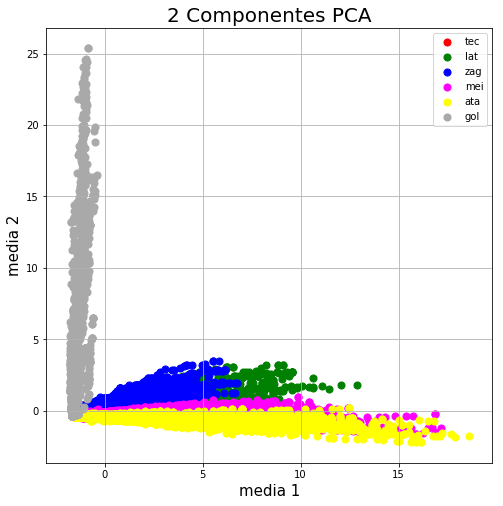

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('media 1', fontsize = 15)
ax.set_ylabel('media 2', fontsize = 15)
ax.set_title('2 Componentes PCA', fontsize = 20)


targets = ['tec', 'lat', 'zag', 'mei', 'ata', 'gol']
colors = ['r', 'g', 'b','#FF00FF','#FFFF00','#A9A9A9']
for alvo, color in zip(targets,colors):
    indicesToKeep = finalDf['posicao_id'] == alvo
    ax.scatter(finalDf.loc[indicesToKeep, 'media 1']
               , finalDf.loc[indicesToKeep, 'media 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [39]:
pca.explained_variance_ratio_

array([0.39268711, 0.14966021, 0.09054055])

Contudo, demonstra que os melhores a serem investidos, são sempre goleiros com melhores médias nas partidas